In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 


In [235]:
# Read data from diabetes csv
data = pd.read_csv("./diabetes.csv")
x = data.drop("Outcome",axis= 1)
y = data["Outcome"]

Accuracy (RF - Gini) : 77.27272727272727
Confusion Matrix (RF - Gini) :
 [[88 16]
 [19 31]]


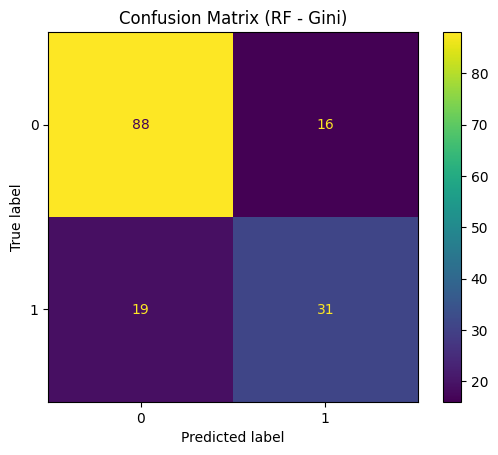

Accuracy (RF - Entropy) : 79.22077922077922
Confusion Matrix (RF - Entropy) :
 [[88 16]
 [16 34]]


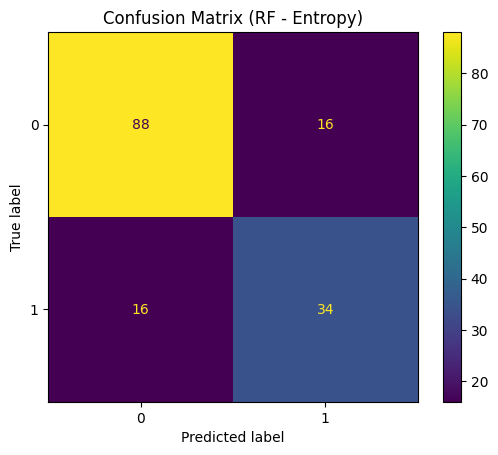

In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# Random Forest : Gini
rf_gini = RandomForestClassifier(criterion="gini",random_state=42)
rf_gini.fit(x_train,y_train)
pred_rf_gini = rf_gini.predict(x_test)
acc_gini = accuracy_score(y_true=y_test, y_pred=pred_rf_gini)
print("Accuracy (RF - Gini) :", acc_gini*100)

# Matrice de confusion
cm_gini = confusion_matrix(y_test, pred_rf_gini)
print("Confusion Matrix (RF - Gini) :\n", cm_gini)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini)
disp_gini.plot()
plt.title("Confusion Matrix (RF - Gini)")
plt.show()

# Random Forest : Entropy
rf_entropy = RandomForestClassifier(criterion="entropy",random_state=42)
rf_entropy.fit(x_train,y_train)
pred_rf_entropy = rf_entropy.predict(x_test)
acc_entropy = accuracy_score(y_true=y_test, y_pred=pred_rf_entropy)
print("Accuracy (RF - Entropy) :", acc_entropy*100)

# Matrice de confusion
cm_entropy = confusion_matrix(y_test, pred_rf_entropy)
print("Confusion Matrix (RF - Entropy) :\n", cm_entropy)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy)
disp_entropy.plot()
plt.title("Confusion Matrix (RF - Entropy)")
plt.show()


In [237]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Accuracy (RF + PCA - Gini) : 77.27272727272727
Confusion Matrix (RF + PCA - Gini) :
 [[84 20]
 [15 35]]


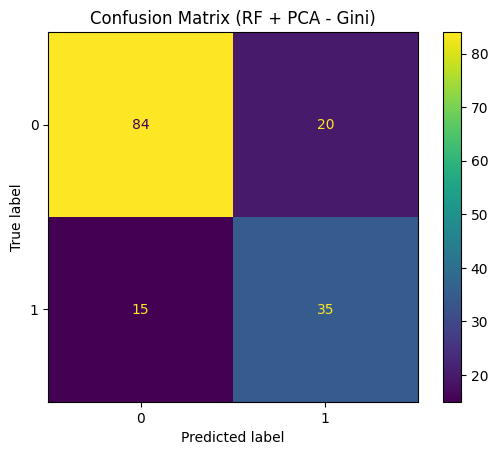

Accuracy (RF + PCA - Entropy) : 74.02597402597402
Confusion Matrix (RF + PCA - Entropy) :
 [[82 22]
 [18 32]]


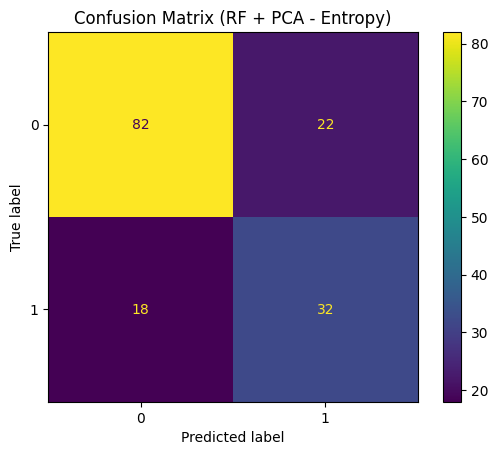

In [238]:
# Random Forest post-PCA : Gini
rf_gini_pca = RandomForestClassifier(criterion='gini',random_state=42)
rf_gini_pca.fit(x_train_pca,y_train)
pred_x_rf_pca = rf_gini_pca.predict(x_test_pca)
acc_gini_pca = accuracy_score(y_true=y_test,y_pred = pred_x_rf_pca)
print("Accuracy (RF + PCA - Gini) :", acc_gini_pca*100)

# Matrice de confusion
cm_gini_pca = confusion_matrix(y_test, pred_x_rf_pca)
print("Confusion Matrix (RF + PCA - Gini) :\n", cm_gini_pca)

disp_gini_pca = ConfusionMatrixDisplay(confusion_matrix=cm_gini_pca)
disp_gini_pca.plot()
plt.title("Confusion Matrix (RF + PCA - Gini)")
plt.show()

# Random Forest post-PCA : Entropy
rf_entropy_pca = RandomForestClassifier(criterion='entropy', random_state=42)
rf_entropy_pca.fit(x_train_pca, y_train)
y_pred_entropy_pca = rf_entropy_pca.predict(x_test_pca)
acc_entropy_pca = accuracy_score(y_test, y_pred_entropy_pca)
print("Accuracy (RF + PCA - Entropy) :", acc_entropy_pca*100)

# Matrice de confusion
cm_entropy_pca = confusion_matrix(y_test, y_pred_entropy_pca)
print("Confusion Matrix (RF + PCA - Entropy) :\n", cm_entropy_pca)

disp_entropy_pca = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_pca)
disp_entropy_pca.plot()
plt.title("Confusion Matrix (RF + PCA - Entropy)")
plt.show()


In [239]:
print(f"Without PCA -> Gini: {acc_gini:.3f}, Entropy: {acc_entropy:.3f}")
print(f"With PCA -> Gini: {acc_gini_pca:.3f}, Entropy: {acc_entropy_pca:.3f}")

Without PCA -> Gini: 0.773, Entropy: 0.792
With PCA -> Gini: 0.773, Entropy: 0.740
